## Agency_Case_Study

Our advertising agency collects data including:
 
Impressions and their attributes associated with the delivery of digital media.
Transaction level data describing the actions taken by message recipients in response to digital media.
Media spend and revenue driven by media.
 
In this exercise, we look at a fictional data set for an online travel service client (e.g. Expedia or Orbitz). All files are tab delimited.


Methodology:

General descriptions of each dataset provided:

Impressions - Cookie level record of display advertisements (impressions) served. (cookie_id, activity_tag, activity_type)

Activity - Cookie level record of conversion activities. (cookie_id, activity_tag, activity_type)

Ad Lookup - Record of attributes of each ad. (ad_id, ad_size, ad_format)

Placement Lookup - Record of attributes of each placement. (placement_id, category_id, cpi)

Category Lookup - Record of attributes of each category. (category_id, category, avg_purchase_price)

Converting the raw data into the dataset used in the analysis: Since all of the files were tab delimited, I took a few steps before I got to this point.

1. I downloaded the files and then uploaded them into seperate excel sheets.
2. I then used the 'Text to Columns' function to sort everything into the appropriate rows and saved the pages as CSV files.
3. Then I created a local database in DB Browser in order to get the data into a format compatible with Jupyter.


In order to better understand which variables effect our bottom line; I'm going to explore the question below.



1. 	Which Ads are most effective in generating conversions?  Which Ads are most efficient? Why might this be?
2. 	Which Placements are most effective in generating conversions?  Which Placements are most efficient?  Why might this be?
3. 	What are the possible confounds that may undermine your conclusions?
4. 	What would you do to improve the analysis?  Is there additional data you’d like to have available that would allow you to sharpen your findings?
5. 	What would your recommendation to the client be?


Glossary:

-Impression: a record that indicates an online ad was served to a computer that is connected to the Internet. This information is collected from cookies.

-Cookie: a small textfile sent to browsers and is used to measure a user's interaction with various websites anonymously. It's an important component of determining the effectiveness of an ad campaign.

-Media Spend: the amount of money budgeted to an ad campaign.

-Cost per Impression (CPI): the cost to have a single ad delivered to a computer.

-View-Through Conversion: a user who purchases an advertised product after exposed to one or more ads of the product without clicking on an ad of that product. The user is considered to have purchased the product once (s)he reaches the purchase-confirmation webpage.

-Placement: the website that an ad appears in.

-ROI: The benefit (or return) of an investment is divided by the cost of the investment.

-Click-To-Purchase: The customer made a purchase through clicking on the Ad.

-Purchase: All purchases including Click-To_Purchases and all other purchasing methods.

# Summary of Analysis

Ad Size:
    
The larger ads had the highest Click-to-Purchase rates. Ad Size 970x250 was the highest at 16%, with the highest overall purcahse rate too at 64%. The other Ad Sizes that performed particularly well were 500x600 and 300x600, both had click-to-purchase rates around 12%
    
The lowest click-to_purchase ad size was 728x90 at 5.28. The news video has the lowest overall purchase rate at only 15% with only 6% coming from clicks.
    
Placement:

3714, 3715, and 3716 are the placement Ids with the highest click-to-purchase rates. Placements 3715 and 3716 also have the highest overall purchase rates at 64%.
    
Ad ID:
     
Ad ID 326 has the highest click-to purchase rate. It is a Travel Ad that brings an over 500% return on investment. We are losing money on our video news ad with an ROI of -22%.
    
Categories:

Travel has the highest return on investment at 567%. News has the lowest at 11%. Travel also has the highest overall purchase rate at 48.89%, but the click-to purchase rate is only 11.55%. The much lower click-to-purchase rate suggests that a confounding variable of this study is that travel is a necessity of many customers. 

Weather has a 20% overall purchase rate and a 10% click-to-purchase rate. Gaming and news also have around 50% of their purchases made through clicks on their ads.
    
Format:

Rich-Media features only Travel and News ads and has a 375% return on investment. Rich-Media has a 50% conversion rate, which is more than double that of Standard or Video.

Recommendations:

1. Remove the video news ad with the Ad ID 328. We've lost $6300 on that video.

2. Further explore why the percentage of click-to-purchase rates on travel are so low in comparison to their overall purchase rates. If there is a better way to advertize to people who are buying out of necessity; we could win over even more purchasers.

3. Take a closer look at the individual Rich-Media Format campaigns. The return on investment and the purchase rates affiliated with them are sky high, but they do represent a very small sample size in comparison to our standard ad format.

In [116]:
#import all tools needed for analysis
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
#Create SQLite connection to the database I made
database = "Agency_Case_Study1.db"
connection = sql.connect(database)

In [118]:
#Create SQL query in order to join all of the tables in my database. It's important to pay attention to the type of join used- doing join improperly can result in data lost.

query = '''SELECT i.Ad_ID, i.Placement_ID, i.Cookie_ID, c.Category_ID, c.Category, c.AVG_Purchase_Price, al.Ad_Size, al.Ad_Format, a.Activity_Tag, a.Activity_Type, pl.CPI 
FROM IMPRESSIONS i
LEFT JOIN ACTIVITY a ON i.Cookie_ID = a.Cookie_ID
LEFT JOIN Placement_Lookup pl ON i.Placement_ID = pl.Placement_ID
LEFT JOIN Category_Lookup c ON pl.Category_ID = c.Category_ID
LEFT JOIN Ad_Lookup al ON i.Ad_ID = al.Ad_ID
'''
df = pd.read_sql_query(query, connection)
df.head()

,Ad_ID,Placement_ID,Cookie_ID,Category_ID,Category,AVG_Purchase_Price,Ad_Size,Ad_Format,Activity_Tag,Activity_Type,CPI
0,325,3719,12270,10002,Weather,150.00,300x600,Standard,None,None,8.00
1,324,3718,15956,10002,Weather,150.00,728x90,Standard,None,None,8.00
2,325,3714,3793,10001,Travel,200.00,300x600,Standard,None,None,12.00
3,324,3721,9599,10003,News,250.00,728x90,Standard,None,None,20.00
4,323,3720,16807,10003,News,250.00,300x250,Standard,None,None,20.00


In [94]:
df.describe()

,Ad_ID,Placement_ID,Cookie_ID,Category_ID,Category,AVG_Purchase_Price,Ad_Size,Ad_Format,Activity_Tag,Activity_Type,CPI
count,40500,40500,40500,40500,40500,40500,40500,40500,9816,9816,40500
unique,6,16,18150,4,4,4,6,3,1,2,6
top,325,3718,15224,10002,Weather,150.00,300x600,Standard,pur_conf,1,8.00
freq,11700,4500,6,13500,13500,13500,11700,35100,9816,6246,13500


We have our data in one place, so now we can check to make sure the data types are correct for our analysis.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 11 columns):
Ad_ID                 40500 non-null object
Placement_ID          40500 non-null object
Cookie_ID             40500 non-null object
Category_ID           40500 non-null object
Category              40500 non-null object
AVG_Purchase_Price    40500 non-null object
Ad_Size               40500 non-null object
Ad_Format             40500 non-null object
Activity_Tag          9816 non-null object
Activity_Type         9816 non-null object
CPI                   40500 non-null object
dtypes: object(11)
memory usage: 3.4+ MB


In [119]:
#Change data types in order to have Python recognize data and save space.
df['Ad_ID'] = df['Ad_ID'].astype('category')
df['Placement_ID'] = df['Placement_ID'].astype('category')
df['Cookie_ID'] = df['Cookie_ID'].astype('int')
df['Category_ID'] = df['Category_ID'].astype('int')
df['Category'] = df['Category'].astype('category')
df['AVG_Purchase_Price'] = df['AVG_Purchase_Price'].astype('float')
df['Ad_Size'] = df['Ad_Size'].astype('category')
df['Ad_Format'] = df['Ad_Format'].astype('category')
df['Activity_Tag'] = df['Activity_Tag'].astype('category')
df['Activity_Type'] = df['Activity_Type'].astype('category')
df['CPI'] = df['CPI'].astype('float')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 11 columns):
Ad_ID                 40500 non-null category
Placement_ID          40500 non-null category
Cookie_ID             40500 non-null int32
Category_ID           40500 non-null int32
Category              40500 non-null category
AVG_Purchase_Price    40500 non-null float64
Ad_Size               40500 non-null category
Ad_Format             40500 non-null category
Activity_Tag          9816 non-null category
Activity_Type         9816 non-null category
CPI                   40500 non-null float64
dtypes: category(7), float64(2), int32(2)
memory usage: 1.2 MB


Now that we have our data all in one place; I'm going to create some series to take a look at the 2 different activity types. ACTIVITY_TYPE = 1 indicates a view through conversion (users who reached purchase confirmation page without clicking on an ad) and ACTIVITY_TYPE = 2 indicates a click through conversion (users who reached purchase confirmation page after clicking on an ad). For the purposes of this project, we are going to look at activity type 2, because it lets us know how many purchasers through clicking the ad. Our Purchase series it everyone who made a purchase.

In [120]:
#create series to only have data where a purchase was made through clicking on the ad.
Purchase_Click = df[(df.Activity_Type == '2')]

In [121]:
#create series to support data from all purchases.
Purchase = df[(df.Activity_Tag == 'pur_conf')]

In [100]:
Purchase.describe()

,Cookie_ID,Category_ID,AVG_Purchase_Price,CPI
count,9816.000000,9816.000000,9816.000000,9816.00000
mean,10180.107172,10001.759169,173.594132,12.91687
std,5935.749093,0.998556,51.563036,6.73604
min,4.000000,10001.000000,50.000000,4.00000
25%,5093.000000,10001.000000,150.000000,8.00000
50%,9962.500000,10001.000000,200.000000,12.00000
75%,15345.000000,10002.000000,200.000000,20.00000
max,20397.000000,10004.000000,250.000000,48.00000


# Popular Ad Size

###### ---Overview of Ad_Size--- 

The ads with the highest click-to-purchase rates are Ad_Size 970x250 with 16%, Ad_size 500x600 with 12% and Ad_Size 300x600 with 11.44%.

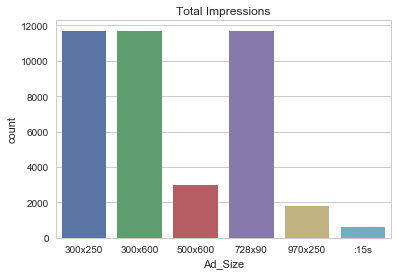

In [101]:
#plot number of total impressions for each ad size
sns.countplot(x="Ad_Size", data=df)
plt.title('Total Impressions')

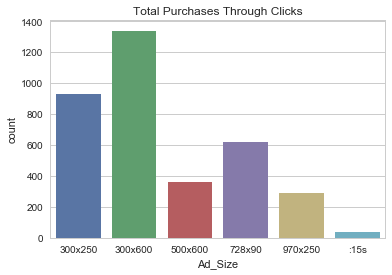

In [102]:
#plot number of clicks that led to purchases
sns.countplot(x="Ad_Size", data=Purchase_Click);
plt.title('Total Purchases Through Clicks')

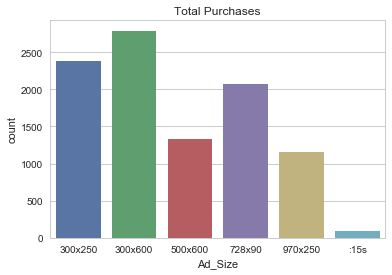

In [103]:
#plot total purchases made
sns.countplot(x="Ad_Size", data=Purchase);
plt.title('Total Purchases')

In [150]:
# AD_SIZE 300x250
#create series for purchases, click_to_purchases, and full impressions for ad size 300x250
purchase_300x250 = Purchase[(Purchase.Ad_Size == '300x250')]
click_300x250 = Purchase_Click[(Purchase_Click.Ad_Size == '300x250')]
impression_300x250 = df[(df.Ad_Size == '300x250')]

#find click to purchase rate for ad 300x250
click_to_purchase_rate_300x250 = len(click_300x250)/float(len(impression_300x250)) * 100
print "300x250 click-to-purchase %:",click_to_purchase_rate_300x250


# AD_SIZE 300x600
#create series for purchases, click_to_purchases, and full impressions for ad size 300x600
purchase_300x600 = Purchase[(Purchase.Ad_Size == '300x600')]
click_300x600 = Purchase_Click[(Purchase_Click.Ad_Size == '300x600')]
impression_300x600 = df[(df.Ad_Size == '300x600')]

#find click to purchase rate for ad 300x600
click_to_purchase_rate_300x600 = len(click_300x600)/float(len(impression_300x600)) * 100
print "300x600 click-to-purchase %:",click_to_purchase_rate_300x600


# AD_SIZE 500x600
#create series for purchases, click_to_purchases, and full impressions for ad size 500x600
purchase_500x600 = Purchase[(Purchase.Ad_Size == '500x600')]
click_500x600 = Purchase_Click[(Purchase_Click.Ad_Size == '500x600')]
impression_500x600 = df[(df.Ad_Size == '500x600')]

#find click to purchase rate for ad 300x600
click_to_purchase_rate_500x600 = len(click_500x600)/float(len(impression_500x600)) * 100
print "500x600 click-to-purchase %:",click_to_purchase_rate_500x600


# AD_SIZE 728x90
#create series for purchases, click_to_purchases, and full impressions for ad size 728x90
purchase_728x90 = Purchase[(Purchase.Ad_Size == '728x90')]
click_728x90 = Purchase_Click[(Purchase_Click.Ad_Size == '728x90')]
impression_728x90 = df[(df.Ad_Size == '728x90')]

#find click to purchase rate for ad 300x600
click_to_purchase_rate_728x90 = len(click_728x90)/float(len(impression_728x90)) * 100
print "728x90 click-to-purchase %:",click_to_purchase_rate_728x90


# AD_SIZE 970x250
#create series for purchases, click_to_purchases, and full impressions for ad size 970x250
purchase_970x250 = Purchase[(Purchase.Ad_Size == '970x250')]
click_970x250 = Purchase_Click[(Purchase_Click.Ad_Size == '970x250')]
impression_970x250 = df[(df.Ad_Size == '970x250')]

#find click to purchase rate for ad 970x250
click_to_purchase_rate_970x250 = len(click_970x250)/float(len(impression_970x250)) * 100
print "970x250 click-to-purchase %:",click_to_purchase_rate_970x250


# AD_SIZE :15s
#create series for purchases, click_to_purchases, and full impressions for ad size :15s
purchase_vid = Purchase[(Purchase.Ad_Size == ':15s')]
click_vid = Purchase_Click[(Purchase_Click.Ad_Size == ':15s')]
impression_vid = df[(df.Ad_Size == ':15s')]

#find click to purchase rate for ad :15s
click_to_purchase_rate_vid = len(click_vid)/float(len(impression_vid)) * 100
print "video click-to-purchase %:",click_to_purchase_rate_vid

300x250 click-to-purchase %: 7.94871794872
300x600 click-to-purchase %: 11.4358974359
500x600 click-to-purchase %: 12.0
728x90 click-to-purchase %: 5.28205128205
970x250 click-to-purchase %: 16.0
video click-to-purchase %: 6.0


In [151]:
ad_size_click = {'Ad_Size': ['300x250', '300x600', '500x600', '728x90', '970x250', 'video'],'Click-to-purchase': [click_to_purchase_rate_300x250, click_to_purchase_rate_300x600, click_to_purchase_rate_500x600, click_to_purchase_rate_728x90, click_to_purchase_rate_970x250, click_to_purchase_rate_vid]}
CTR_df = pd.DataFrame(data=ad_size_click)
CTR_df

,Ad_Size,Click-to-purchase
0,300x250,7.948718
1,300x600,11.435897
2,500x600,12.000000
3,728x90,5.282051
4,970x250,16.000000
5,video,6.000000


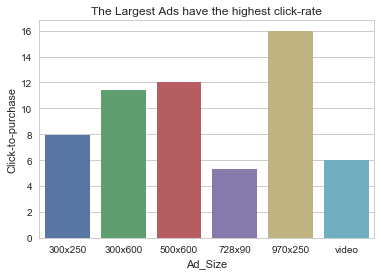

In [152]:
sns.barplot(x="Ad_Size", y="Click-to-purchase", data=CTR_df);
plt.title('The Largest Ads have the highest click-rate')

In [153]:
# AD_SIZE 300x250
#create series for purchases, click_to_purchases, and full impressions for ad size 300x250
purchase_300x250 = Purchase[(Purchase.Ad_Size == '300x250')]
click_300x250 = Purchase_Click[(Purchase_Click.Ad_Size == '300x250')]
impression_300x250 = df[(df.Ad_Size == '300x250')]

#find full purchase rate of ad size 300x250
purchase_rate_300x250 = len(purchase_300x250)/float(len(impression_300x250)) * 100
print "300x250 purchase %:",purchase_rate_300x250



# AD_SIZE 300x600
#create series for purchases, click_to_purchases, and full impressions for ad size 300x600
purchase_300x600 = Purchase[(Purchase.Ad_Size == '300x600')]
click_300x600 = Purchase_Click[(Purchase_Click.Ad_Size == '300x600')]
impression_300x600 = df[(df.Ad_Size == '300x600')]

#find full purchase rate of ad size 300x600
purchase_rate_300x600 = len(purchase_300x600)/float(len(impression_300x600)) * 100
print "300x600 purchase %:",purchase_rate_300x600



# AD_SIZE 500x600
#create series for purchases, click_to_purchases, and full impressions for ad size 500x600
purchase_500x600 = Purchase[(Purchase.Ad_Size == '500x600')]
click_500x600 = Purchase_Click[(Purchase_Click.Ad_Size == '500x600')]
impression_500x600 = df[(df.Ad_Size == '500x600')]

#find full purchase rate of ad size 500x600
purchase_rate_500x600 = len(purchase_500x600)/float(len(impression_500x600)) * 100
print "500x600 purchase %:",purchase_rate_500x600



# AD_SIZE 728x90
#create series for purchases, click_to_purchases, and full impressions for ad size 728x90
purchase_728x90 = Purchase[(Purchase.Ad_Size == '728x90')]
click_728x90 = Purchase_Click[(Purchase_Click.Ad_Size == '728x90')]
impression_728x90 = df[(df.Ad_Size == '728x90')]

#find full purchase rate of ad size 500x600
purchase_rate_728x90 = len(purchase_728x90)/float(len(impression_728x90)) * 100
print "728x90 purchase %:",purchase_rate_728x90



# AD_SIZE 970x250
#create series for purchases, click_to_purchases, and full impressions for ad size 970x250
purchase_970x250 = Purchase[(Purchase.Ad_Size == '970x250')]
click_970x250 = Purchase_Click[(Purchase_Click.Ad_Size == '970x250')]
impression_970x250 = df[(df.Ad_Size == '970x250')]

#find full purchase rate of ad size 970x250
purchase_rate_970x250 = len(purchase_970x250)/float(len(impression_970x250)) * 100
print "970x250 purchase %:",purchase_rate_970x250



# AD_SIZE :15s
#create series for purchases, click_to_purchases, and full impressions for ad size :15s
purchase_vid = Purchase[(Purchase.Ad_Size == ':15s')]
click_vid = Purchase_Click[(Purchase_Click.Ad_Size == ':15s')]
impression_vid = df[(df.Ad_Size == ':15s')]

#find full purchase rate of ad size :15s
purchase_rate_vid = len(purchase_vid)/float(len(impression_vid)) * 100
print "video purchase %:",purchase_rate_vid

300x250 purchase %: 20.358974359
300x600 purchase %: 23.8461538462
500x600 purchase %: 44.4
728x90 purchase %: 17.6923076923
970x250 purchase %: 64.0
video purchase %: 15.0


In [154]:
ad_size_pur = {'Ad_Size': ['300x250', '300x600', '500x600', '728x90', '970x250', 'video'],'purchase': [purchase_rate_300x250, purchase_rate_300x600, purchase_rate_500x600, purchase_rate_728x90, purchase_rate_970x250, purchase_rate_vid]}
pur_df = pd.DataFrame(data=ad_size_pur)
pur_df

,Ad_Size,purchase
0,300x250,20.358974
1,300x600,23.846154
2,500x600,44.400000
3,728x90,17.692308
4,970x250,64.000000
5,video,15.000000


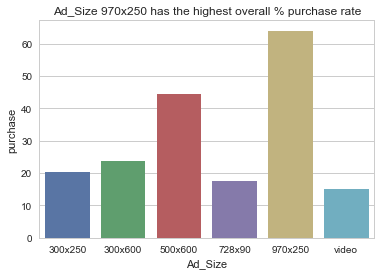

In [155]:
sns.barplot(x="Ad_Size", y="purchase", data=pur_df);
plt.title('Ad_Size 970x250 has the highest overall % purchase rate')

# Ad Placement

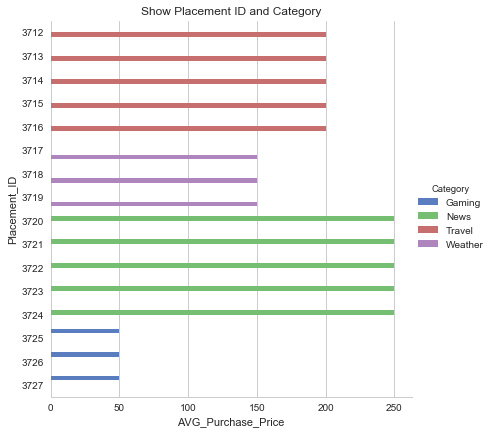

In [278]:
sns.set(style="whitegrid")
#create a factor plot to show the pricing and cost of each Ad-Placement
g = sns.factorplot(x="AVG_Purchase_Price", y="Placement_ID", hue="Category", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Placement_ID")
plt.title('Show Placement ID and Category')

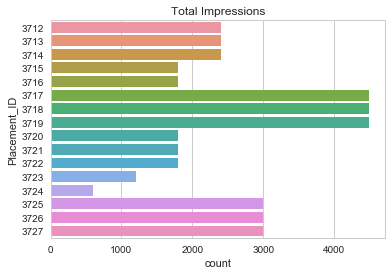

In [167]:
#plot number of total impressions for each ad size
sns.countplot(y="Placement_ID", data=df)
plt.title('Total Impressions')

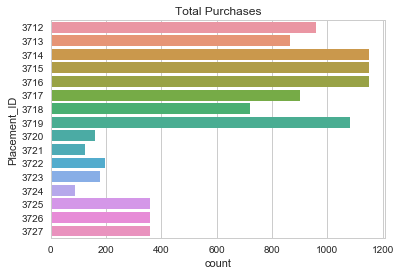

In [169]:
#plot number of total impressions for each ad size
sns.countplot(y="Placement_ID", data=Purchase)
plt.title('Total Purchases')

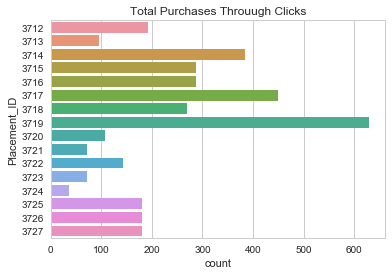

In [171]:
#plot number of total impressions for each ad size
sns.countplot(y="Placement_ID", data=Purchase_Click)
plt.title('Total Purchases Throuugh Clicks')

In [193]:
# AD_Placement 3712
#create series for purchases, click_to_purchases, and full impressions for ad placement 3712
purchase_3712 = Purchase[(Purchase.Placement_ID == '3712')]
click_3712 = Purchase_Click[(Purchase_Click.Placement_ID == '3712')]
impression_3712 = df[(df.Placement_ID == '3712')]

#find click to purchase rate for placement 3712
click_to_purchase_rate_3712 = len(click_3712)/float(len(impression_3712)) * 100
print "3712 click-to-purchase %:",click_to_purchase_rate_3712

# AD_Placement 3713
#create series for purchases, click_to_purchases, and full impressions for ad placement 3713
purchase_3713 = Purchase[(Purchase.Placement_ID == '3713')]
click_3713 = Purchase_Click[(Purchase_Click.Placement_ID == '3713')]
impression_3713 = df[(df.Placement_ID == '3713')]

#find click to purchase rate for placement 3713
click_to_purchase_rate_3713 = len(click_3713)/float(len(impression_3713)) * 100
print "3713 click-to-purchase %:",click_to_purchase_rate_3713

# AD_Placement 3714
#create series for purchases, click_to_purchases, and full impressions for ad placement 3714
purchase_3714 = Purchase[(Purchase.Placement_ID == '3714')]
click_3714 = Purchase_Click[(Purchase_Click.Placement_ID == '3714')]
impression_3714 = df[(df.Placement_ID == '3714')]

#find click to purchase rate for placement 3714
click_to_purchase_rate_3714 = len(click_3714)/float(len(impression_3714)) * 100
print "3714 click-to-purchase %:",click_to_purchase_rate_3714

# AD_Placement 3715
#create series for purchases, click_to_purchases, and full impressions for ad placement 3715
purchase_3715 = Purchase[(Purchase.Placement_ID == '3715')]
click_3715 = Purchase_Click[(Purchase_Click.Placement_ID == '3715')]
impression_3715 = df[(df.Placement_ID == '3715')]

#find click to purchase rate for placement 3715
click_to_purchase_rate_3715 = len(click_3715)/float(len(impression_3715)) * 100
print "3715 click-to-purchase %:",click_to_purchase_rate_3715

# AD_Placement 3716
#create series for purchases, click_to_purchases, and full impressions for ad placement 3716
purchase_3716 = Purchase[(Purchase.Placement_ID == '3716')]
click_3716 = Purchase_Click[(Purchase_Click.Placement_ID == '3716')]
impression_3716 = df[(df.Placement_ID == '3716')]

#find click to purchase rate for placement 3716
click_to_purchase_rate_3716 = len(click_3716)/float(len(impression_3716)) * 100
print "3716 click-to-purchase %:",click_to_purchase_rate_3716

# AD_Placement 3717
#create series for purchases, click_to_purchases, and full impressions for ad placement 3717
purchase_3717 = Purchase[(Purchase.Placement_ID == '3717')]
click_3717 = Purchase_Click[(Purchase_Click.Placement_ID == '3717')]
impression_3717 = df[(df.Placement_ID == '3717')]

#find click to purchase rate for placement 3717
click_to_purchase_rate_3717 = len(click_3717)/float(len(impression_3717)) * 100
print "3717 click-to-purchase %:",click_to_purchase_rate_3717

# AD_Placement 3718
#create series for purchases, click_to_purchases, and full impressions for ad placement 3718
purchase_3718 = Purchase[(Purchase.Placement_ID == '3718')]
click_3718 = Purchase_Click[(Purchase_Click.Placement_ID == '3718')]
impression_3718 = df[(df.Placement_ID == '3718')]

#find click to purchase rate for placement 3718
click_to_purchase_rate_3718 = len(click_3718)/float(len(impression_3718)) * 100
print "3718 click-to-purchase %:",click_to_purchase_rate_3718

# AD_Placement 3719
#create series for purchases, click_to_purchases, and full impressions for ad placement 3719
purchase_3719 = Purchase[(Purchase.Placement_ID == '3719')]
click_3719 = Purchase_Click[(Purchase_Click.Placement_ID == '3719')]
impression_3719 = df[(df.Placement_ID == '3719')]

#find click to purchase rate for placement 3719
click_to_purchase_rate_3719 = len(click_3719)/float(len(impression_3719)) * 100
print "3719 click-to-purchase %:",click_to_purchase_rate_3719

# AD_Placement 3720
#create series for purchases, click_to_purchases, and full impressions for ad placement 3720
purchase_3720 = Purchase[(Purchase.Placement_ID == '3720')]
click_3720 = Purchase_Click[(Purchase_Click.Placement_ID == '3720')]
impression_3720 = df[(df.Placement_ID == '3720')]

#find click to purchase rate for placement 3720
click_to_purchase_rate_3720 = len(click_3720)/float(len(impression_3720)) * 100
print "3720 click-to-purchase %:",click_to_purchase_rate_3720

# AD_Placement 3721
#create series for purchases, click_to_purchases, and full impressions for ad placement 3721
purchase_3721 = Purchase[(Purchase.Placement_ID == '3721')]
click_3721 = Purchase_Click[(Purchase_Click.Placement_ID == '3721')]
impression_3721 = df[(df.Placement_ID == '3721')]

#find click to purchase rate for placement 3721
click_to_purchase_rate_3721 = len(click_3721)/float(len(impression_3721)) * 100
print "3721 click-to-purchase %:",click_to_purchase_rate_3721

# AD_Placement 3722
#create series for purchases, click_to_purchases, and full impressions for ad placement 3722
purchase_3722 = Purchase[(Purchase.Placement_ID == '3722')]
click_3722 = Purchase_Click[(Purchase_Click.Placement_ID == '3722')]
impression_3722 = df[(df.Placement_ID == '3722')]

#find click to purchase rate for placement 3722
click_to_purchase_rate_3722 = len(click_3722)/float(len(impression_3722)) * 100
print "3722 click-to-purchase %:",click_to_purchase_rate_3722

# AD_Placement 3723
#create series for purchases, click_to_purchases, and full impressions for ad placement 3723
purchase_3723 = Purchase[(Purchase.Placement_ID == '3723')]
click_3723 = Purchase_Click[(Purchase_Click.Placement_ID == '3723')]
impression_3723 = df[(df.Placement_ID == '3723')]

#find click to purchase rate for placement 3723
click_to_purchase_rate_3723 = len(click_3723)/float(len(impression_3723)) * 100
print "3723 click-to-purchase %:",click_to_purchase_rate_3723

# AD_Placement 3724
#create series for purchases, click_to_purchases, and full impressions for ad placement 3724
purchase_3724 = Purchase[(Purchase.Placement_ID == '3724')]
click_3724 = Purchase_Click[(Purchase_Click.Placement_ID == '3724')]
impression_3724 = df[(df.Placement_ID == '3724')]

#find click to purchase rate for placement 3724
click_to_purchase_rate_3724 = len(click_3724)/float(len(impression_3724)) * 100
print "3724 click-to-purchase %:",click_to_purchase_rate_3724

# AD_Placement 3725
#create series for purchases, click_to_purchases, and full impressions for ad placement 3725
purchase_3725 = Purchase[(Purchase.Placement_ID == '3725')]
click_3725 = Purchase_Click[(Purchase_Click.Placement_ID == '3725')]
impression_3725 = df[(df.Placement_ID == '3725')]

#find click to purchase rate for placement 3725
click_to_purchase_rate_3725 = len(click_3725)/float(len(impression_3725)) * 100
print "3725 click-to-purchase %:",click_to_purchase_rate_3725

# AD_Placement 3726
#create series for purchases, click_to_purchases, and full impressions for ad placement 3726
purchase_3726 = Purchase[(Purchase.Placement_ID == '3726')]
click_3726 = Purchase_Click[(Purchase_Click.Placement_ID == '3726')]
impression_3726 = df[(df.Placement_ID == '3726')]

#find click to purchase rate for placement 3726
click_to_purchase_rate_3726 = len(click_3726)/float(len(impression_3726)) * 100
print "3726 click-to-purchase %:",click_to_purchase_rate_3726

# AD_Placement 3727
#create series for purchases, click_to_purchases, and full impressions for ad placement 3727
purchase_3727 = Purchase[(Purchase.Placement_ID == '3727')]
click_3727 = Purchase_Click[(Purchase_Click.Placement_ID == '3727')]
impression_3727 = df[(df.Placement_ID == '3727')]

#find click to purchase rate for placement 3727
click_to_purchase_rate_3727 = len(click_3727)/float(len(impression_3727)) * 100
print "3727 click-to-purchase %:",click_to_purchase_rate_3727


3712 click-to-purchase %: 8.0
3713 click-to-purchase %: 4.0
3714 click-to-purchase %: 16.0
3715 click-to-purchase %: 16.0
3716 click-to-purchase %: 16.0
3717 click-to-purchase %: 10.0
3718 click-to-purchase %: 6.0
3719 click-to-purchase %: 14.0
3720 click-to-purchase %: 6.0
3721 click-to-purchase %: 4.0
3722 click-to-purchase %: 8.0
3723 click-to-purchase %: 6.0
3724 click-to-purchase %: 6.0
3725 click-to-purchase %: 6.0
3726 click-to-purchase %: 6.0
3727 click-to-purchase %: 6.0


In [195]:
Placement = {'Placement_ID': ['3712', '3713', '3714', '3715', '3716', '3717','3718','3719','3720','3721','3722','3723','3724','3725','3726','3727'],'Click-to-purchase': [click_to_purchase_rate_3712, click_to_purchase_rate_3713, click_to_purchase_rate_3714, click_to_purchase_rate_3715, click_to_purchase_rate_3716, click_to_purchase_rate_3717,click_to_purchase_rate_3718,click_to_purchase_rate_3719,click_to_purchase_rate_3720,click_to_purchase_rate_3721,click_to_purchase_rate_3722,click_to_purchase_rate_3723,click_to_purchase_rate_3724,click_to_purchase_rate_3725,click_to_purchase_rate_3726,click_to_purchase_rate_3727]}
CTP_df = pd.DataFrame(data=Placement)
CTP_df

,Click-to-purchase,Placement_ID
0,8.0,3712
1,4.0,3713
2,16.0,3714
3,16.0,3715
4,16.0,3716
5,10.0,3717
6,6.0,3718
7,14.0,3719
8,6.0,3720
9,4.0,3721


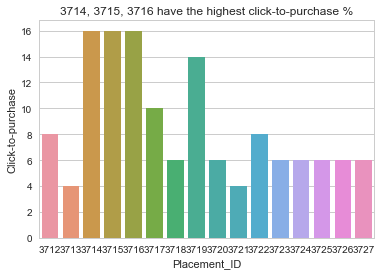

In [197]:
sns.barplot(x="Placement_ID", y="Click-to-purchase", data=CTP_df);
plt.title('3714, 3715, 3716 have the highest click-to-purchase %')

In [192]:
# AD_Placement 3712
#create series for purchases, click_to_purchases, and full impressions for ad placement 3712
purchase_3712 = Purchase[(Purchase.Placement_ID == '3712')]
click_3712 = Purchase_Click[(Purchase_Click.Placement_ID == '3712')]
impression_3712 = df[(df.Placement_ID == '3712')]

#find full purchase rate of ad placement 3712
purchase_rate_3712 = len(purchase_3712)/float(len(impression_3712)) * 100
print "3712 purchase %:",purchase_rate_3712

# AD_Placement 3713
#create series for purchases, click_to_purchases, and full impressions for ad placement 3713
purchase_3713 = Purchase[(Purchase.Placement_ID == '3713')]
click_3713 = Purchase_Click[(Purchase_Click.Placement_ID == '3713')]
impression_3713 = df[(df.Placement_ID == '3713')]

#find full purchase rate of ad placement 3713
purchase_rate_3713 = len(purchase_3713)/float(len(impression_3713)) * 100
print "3713 purchase %:",purchase_rate_3713

# AD_Placement 3714
#create series for purchases, click_to_purchases, and full impressions for ad placement 3714
purchase_3714 = Purchase[(Purchase.Placement_ID == '3714')]
click_3714 = Purchase_Click[(Purchase_Click.Placement_ID == '3714')]
impression_3714 = df[(df.Placement_ID == '3714')]

#find full purchase rate of ad placement 3714
purchase_rate_3714 = len(purchase_3714)/float(len(impression_3714)) * 100
print "3714 purchase %:",purchase_rate_3714

# AD_Placement 3715
#create series for purchases, click_to_purchases, and full impressions for ad placement 3715
purchase_3715 = Purchase[(Purchase.Placement_ID == '3715')]
click_3715 = Purchase_Click[(Purchase_Click.Placement_ID == '3715')]
impression_3715 = df[(df.Placement_ID == '3715')]

#find full purchase rate of ad placement 3715
purchase_rate_3715 = len(purchase_3715)/float(len(impression_3715)) * 100
print "3715 purchase %:",purchase_rate_3715

# AD_Placement 3716
#create series for purchases, click_to_purchases, and full impressions for ad placement 3716
purchase_3716 = Purchase[(Purchase.Placement_ID == '3716')]
click_3716 = Purchase_Click[(Purchase_Click.Placement_ID == '3716')]
impression_3716 = df[(df.Placement_ID == '3716')]

#find full purchase rate of ad placement 3716
purchase_rate_3716 = len(purchase_3716)/float(len(impression_3716)) * 100
print "3716 purchase %:",purchase_rate_3716

# AD_Placement 3717
#create series for purchases, click_to_purchases, and full impressions for ad placement 3717
purchase_3717 = Purchase[(Purchase.Placement_ID == '3717')]
click_3717 = Purchase_Click[(Purchase_Click.Placement_ID == '3717')]
impression_3717 = df[(df.Placement_ID == '3717')]

#find full purchase rate of ad placement 3717
purchase_rate_3717 = len(purchase_3717)/float(len(impression_3717)) * 100
print "3717 purchase %:",purchase_rate_3717

# AD_Placement 3718
#create series for purchases, click_to_purchases, and full impressions for ad placement 3718
purchase_3718 = Purchase[(Purchase.Placement_ID == '3718')]
click_3718 = Purchase_Click[(Purchase_Click.Placement_ID == '3718')]
impression_3718 = df[(df.Placement_ID == '3718')]

#find full purchase rate of ad placement 3718
purchase_rate_3718 = len(purchase_3718)/float(len(impression_3718)) * 100
print "3718 purchase %:",purchase_rate_3718

# AD_Placement 3719
#create series for purchases, click_to_purchases, and full impressions for ad placement 3719
purchase_3719 = Purchase[(Purchase.Placement_ID == '3719')]
click_3719 = Purchase_Click[(Purchase_Click.Placement_ID == '3719')]
impression_3719 = df[(df.Placement_ID == '3719')]

#find full purchase rate of ad placement 3719
purchase_rate_3719 = len(purchase_3719)/float(len(impression_3719)) * 100
print "3719 purchase %:",purchase_rate_3719

# AD_Placement 3720
#create series for purchases, click_to_purchases, and full impressions for ad placement 3720
purchase_3720 = Purchase[(Purchase.Placement_ID == '3720')]
click_3720 = Purchase_Click[(Purchase_Click.Placement_ID == '3720')]
impression_3720 = df[(df.Placement_ID == '3720')]

#find full purchase rate of ad placement 3720
purchase_rate_3720 = len(purchase_3720)/float(len(impression_3720)) * 100
print "3720 purchase %:",purchase_rate_3720

# AD_Placement 3721
#create series for purchases, click_to_purchases, and full impressions for ad placement 3721
purchase_3721 = Purchase[(Purchase.Placement_ID == '3721')]
click_3721 = Purchase_Click[(Purchase_Click.Placement_ID == '3721')]
impression_3721 = df[(df.Placement_ID == '3721')]

#find full purchase rate of ad placement 3721
purchase_rate_3721 = len(purchase_3721)/float(len(impression_3721)) * 100
print "3721 purchase %:",purchase_rate_3721

# AD_Placement 3722
#create series for purchases, click_to_purchases, and full impressions for ad placement 3722
purchase_3722 = Purchase[(Purchase.Placement_ID == '3722')]
click_3722 = Purchase_Click[(Purchase_Click.Placement_ID == '3722')]
impression_3722 = df[(df.Placement_ID == '3722')]

#find full purchase rate of ad placement 3722
purchase_rate_3722 = len(purchase_3722)/float(len(impression_3722)) * 100
print "3722 purchase %:",purchase_rate_3722

# AD_Placement 3723
#create series for purchases, click_to_purchases, and full impressions for ad placement 3723
purchase_3723 = Purchase[(Purchase.Placement_ID == '3723')]
click_3723 = Purchase_Click[(Purchase_Click.Placement_ID == '3723')]
impression_3723 = df[(df.Placement_ID == '3723')]

#find full purchase rate of ad placement 3723
purchase_rate_3723 = len(purchase_3723)/float(len(impression_3723)) * 100
print "3723 purchase %:",purchase_rate_3723

# AD_Placement 3724
#create series for purchases, click_to_purchases, and full impressions for ad placement 3724
purchase_3724 = Purchase[(Purchase.Placement_ID == '3724')]
click_3724 = Purchase_Click[(Purchase_Click.Placement_ID == '3724')]
impression_3724 = df[(df.Placement_ID == '3724')]

#find full purchase rate of ad placement 3724
purchase_rate_3724 = len(purchase_3724)/float(len(impression_3724)) * 100
print "3724 purchase %:",purchase_rate_3724

# AD_Placement 3725
#create series for purchases, click_to_purchases, and full impressions for ad placement 3725
purchase_3725 = Purchase[(Purchase.Placement_ID == '3725')]
click_3725 = Purchase_Click[(Purchase_Click.Placement_ID == '3725')]
impression_3725 = df[(df.Placement_ID == '3725')]

#find full purchase rate of ad placement 3725
purchase_rate_3725 = len(purchase_3725)/float(len(impression_3725)) * 100
print "3725 purchase %:",purchase_rate_3725

# AD_Placement 3726
#create series for purchases, click_to_purchases, and full impressions for ad placement 3726
purchase_3726 = Purchase[(Purchase.Placement_ID == '3726')]
click_3726 = Purchase_Click[(Purchase_Click.Placement_ID == '3726')]
impression_3726 = df[(df.Placement_ID == '3726')]

#find full purchase rate of ad placement 3726
purchase_rate_3726 = len(purchase_3726)/float(len(impression_3726)) * 100
print "3726 purchase %:",purchase_rate_3726

# AD_Placement 3727
#create series for purchases, click_to_purchases, and full impressions for ad placement 3727
purchase_3727 = Purchase[(Purchase.Placement_ID == '3727')]
click_3727 = Purchase_Click[(Purchase_Click.Placement_ID == '3727')]
impression_3727 = df[(df.Placement_ID == '3727')]

#find full purchase rate of ad placement 3727
purchase_rate_3727 = len(purchase_3727)/float(len(impression_3727)) * 100
print "3727 purchase %:",purchase_rate_3727

3712 purchase %: 40.0
3713 purchase %: 36.0
3714 purchase %: 48.0
3715 purchase %: 64.0
3716 purchase %: 64.0
3717 purchase %: 20.0
3718 purchase %: 16.0
3719 purchase %: 24.0
3720 purchase %: 9.0
3721 purchase %: 7.0
3722 purchase %: 11.0
3723 purchase %: 15.0
3724 purchase %: 15.0
3725 purchase %: 12.0
3726 purchase %: 12.0
3727 purchase %: 12.0


In [201]:
Placement1 = {'Placement_ID': ['3712', '3713', '3714', '3715', '3716', '3717','3718','3719','3720','3721','3722','3723','3724','3725','3726','3727'],'purchase': [purchase_rate_3712, purchase_rate_3713, purchase_rate_3714, purchase_rate_3715, purchase_rate_3716, purchase_rate_3717, purchase_rate_3718, purchase_rate_3719, purchase_rate_3720, purchase_rate_3721, purchase_rate_3722, purchase_rate_3723, purchase_rate_3724, purchase_rate_3725, purchase_rate_3726, purchase_rate_3727]}
place_df = pd.DataFrame(data=Placement1)
place_df

,Placement_ID,purchase
0,3712,40.0
1,3713,36.0
2,3714,48.0
3,3715,64.0
4,3716,64.0
5,3717,20.0
6,3718,16.0
7,3719,24.0
8,3720,9.0
9,3721,7.0


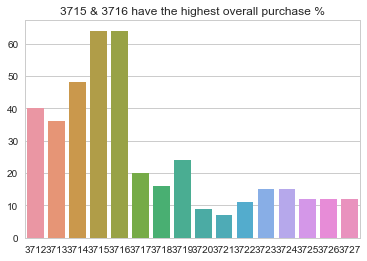

In [203]:
sns.barplot(x="Placement_ID", y="purchase", data=Placement1);
plt.title('3715 & 3716 have the highest overall purchase %')

# Ad ID - Return On Investment (ROI) 

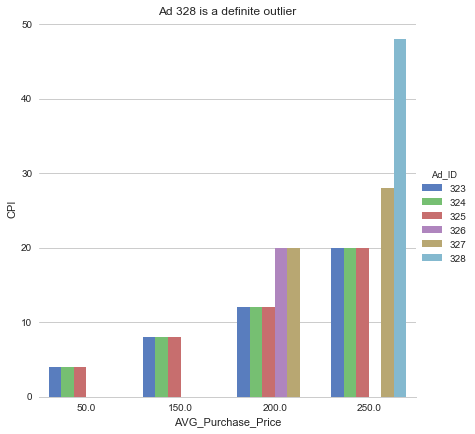

In [156]:
sns.set(style="whitegrid")
#create a factor plot to show the pricing and cost of each Ad-ID
g = sns.factorplot(x="AVG_Purchase_Price", y="CPI", hue="Ad_ID", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("CPI")
plt.title('Ad 328 is a definite outlier')

In [157]:

# AD_ID 323
#create series total price cpi, total money made
impression_323 = df[(df.Ad_ID == '323')]
CPI_paid_323 = impression_323['CPI'].sum()

purchase_323 = Purchase[(Purchase.Ad_ID == '323')]
Amount_made_323 = purchase_323['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 323
ROI_323 = (float(Amount_made_323)-float(CPI_paid_323))/CPI_paid_323
print "323 ROI:", ROI_323


# AD_ID 324
#create series total price cpi, total money made
impression_324 = df[(df.Ad_ID == '324')]
CPI_paid_324 = impression_324['CPI'].sum()

purchase_324 = Purchase[(Purchase.Ad_ID == '324')]
Amount_made_324 = purchase_324['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 324
ROI_324 = (float(Amount_made_324)-float(CPI_paid_324))/CPI_paid_324
print "324 ROI:", ROI_324


# AD_ID 325
#create series total price cpi, total money made
impression_325 = df[(df.Ad_ID == '325')]
CPI_paid_325 = impression_325['CPI'].sum()

purchase_325 = Purchase[(Purchase.Ad_ID == '325')]
Amount_made_325 = purchase_325['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 324
ROI_325 = (float(Amount_made_325)-float(CPI_paid_325))/CPI_paid_325
print "325 ROI:", ROI_325


# AD_ID 326
#create series total price cpi, total money made
impression_326 = df[(df.Ad_ID == '326')]
CPI_paid_326 = impression_326['CPI'].sum()

purchase_326 = Purchase[(Purchase.Ad_ID == '326')]
Amount_made_326 = purchase_326['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 326
ROI_326 = (float(Amount_made_326)-float(CPI_paid_326))/CPI_paid_326
print "326 ROI:", ROI_326


# AD_ID 327
#create series total price cpi, total money made
impression_327 = df[(df.Ad_ID == '327')]
CPI_paid_327 = impression_327['CPI'].sum()

purchase_327 = Purchase[(Purchase.Ad_ID == '327')]
Amount_made_327 = purchase_327['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 327
ROI_327 = (float(Amount_made_327)-float(CPI_paid_327))/CPI_paid_327
print "327 ROI:", ROI_327


# AD_ID 328
#create series total price cpi and total money made.
impression_328 = df[(df.Ad_ID == '328')]
CPI_paid_328 = impression_328['CPI'].sum()

purchase_328 = Purchase[(Purchase.Ad_ID == '328')]
Amount_made_328 = purchase_328['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 328
ROI_328 = (float(Amount_made_328)-float(CPI_paid_328))/CPI_paid_328
print "328 ROI:", ROI_328

323 ROI: 2.41755319149
324 ROI: 1.92819148936
325 ROI: 3.07712765957
326 ROI: 5.4
327 ROI: 2.95689655172
328 ROI: -0.21875


In [158]:
ROI_data = {'ROI': [ROI_323, ROI_324, ROI_325, ROI_326, ROI_327, ROI_328],'Ad_ID': [323, 324, 325, 326, 327, 328]}
ROI_df = pd.DataFrame(data=ROI_data)
ROI_df

,Ad_ID,ROI
0,323,2.417553
1,324,1.928191
2,325,3.077128
3,326,5.400000
4,327,2.956897
5,328,-0.218750


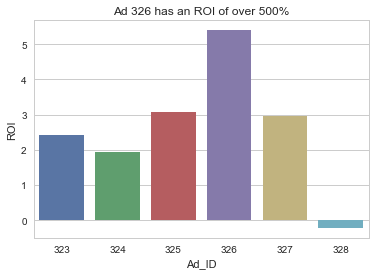

In [159]:
sns.barplot(x="Ad_ID", y="ROI", data=ROI_df);
plt.title('Ad 326 has an ROI of over 500%')

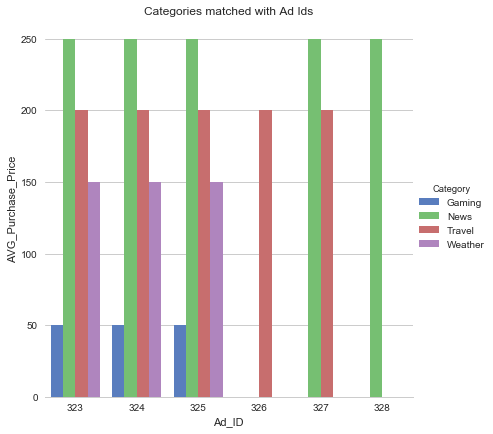

In [269]:
import seaborn as sns
sns.set(style="whitegrid")
#create a graph to show the average price and cpi of the categories
g = sns.factorplot(x="Ad_ID", y="AVG_Purchase_Price", hue="Category", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("AVG_Purchase_Price")
plt.title('Categories matched with Ad Ids')

# Category (ROI)

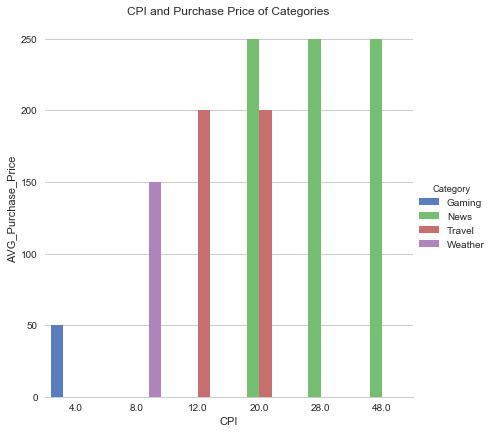

In [205]:
import seaborn as sns
sns.set(style="whitegrid")
#create a graph to show the average price and cpi of the categories
g = sns.factorplot(x="CPI", y="AVG_Purchase_Price", hue="Category", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("AVG_Purchase_Price")
plt.title('CPI and Purchase Price of Categories')

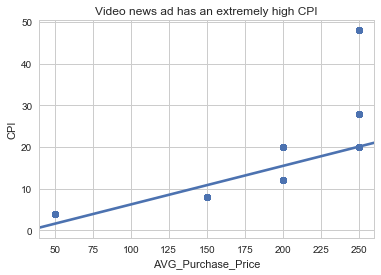

In [215]:
sns.regplot(x="AVG_Purchase_Price", y="CPI", data=df)
plt.title('Video news ad has an extremely high CPI')

In [211]:
# Category Gaming
#create series total price cpi, total money made
impression_Gaming = df[(df.Category == 'Gaming')]
CPI_paid_Gaming = impression_Gaming['CPI'].sum()

purchase_Gaming = Purchase[(Purchase.Category == 'Gaming')]
Amount_made_Gaming = purchase_Gaming['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 323
ROI_Gaming = (float(Amount_made_Gaming)-float(CPI_paid_Gaming))/CPI_paid_Gaming
print "Gaming ROI:", ROI_Gaming

# Category News
#create series total price cpi, total money made
impression_News = df[(df.Category == 'News')]
CPI_paid_News = impression_News['CPI'].sum()

purchase_News = Purchase[(Purchase.Category == 'News')]
Amount_made_News = purchase_News['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 323
ROI_News = (float(Amount_made_News)-float(CPI_paid_News))/CPI_paid_News
print "News ROI:", ROI_News

# Category Travel
#create series total price cpi, total money made
impression_Travel = df[(df.Category == 'Travel')]
CPI_paid_Travel = impression_Travel['CPI'].sum()

purchase_Travel = Purchase[(Purchase.Category == 'Travel')]
Amount_made_Travel = purchase_Travel['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 323
ROI_Travel = (float(Amount_made_Travel)-float(CPI_paid_Travel))/CPI_paid_Travel
print "Travel ROI:", ROI_Travel

# Category Weather
#create series total price cpi, total money made
impression_Weather = df[(df.Category == 'Weather')]
CPI_paid_Weather = impression_Weather['CPI'].sum()

purchase_Weather = Purchase[(Purchase.Category == 'Weather')]
Amount_made_Weather = purchase_Weather['AVG_Purchase_Price'].sum()

#Get ROI for Ad_ID 323
ROI_Weather = (float(Amount_made_Weather)-float(CPI_paid_Weather))/CPI_paid_Weather
print "Weather ROI:", ROI_Weather

Gaming ROI: 0.5
News ROI: 0.109154929577
Travel ROI: 5.66666666667
Weather ROI: 2.75


In [212]:
ROI_categ = {'ROI': [ROI_Gaming, ROI_News, ROI_Travel, ROI_Weather],'Category': ['Gaming', 'News', 'Travel', 'Weather']}
ROI_df1 = pd.DataFrame(data=ROI_categ)
ROI_df1

,Category,ROI
0,Gaming,0.500000
1,News,0.109155
2,Travel,5.666667
3,Weather,2.750000


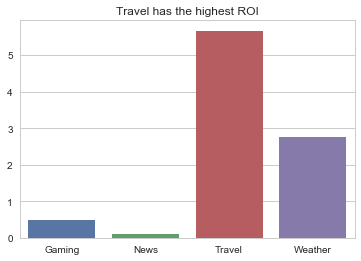

In [214]:
sns.barplot(x="Category", y="ROI", data=ROI_categ);
plt.title('Travel has the highest ROI')

# Category Conversion

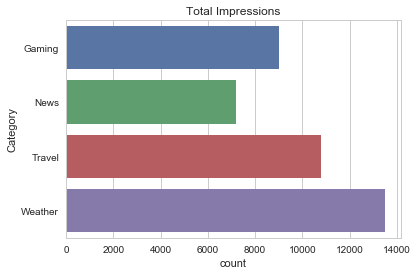

In [270]:
#plot number of total impressions for each ad size
sns.countplot(y="Category", data=df)
plt.title('Total Impressions')

In [219]:
# Category Gaming
#create series for purchases, click_to_purchases, and full impressions for ad category Gaming
purchase_Gaming = Purchase[(Purchase.Category == 'Gaming')]
click_Gaming = Purchase_Click[(Purchase_Click.Category == 'Gaming')]
impression_Gaming = df[(df.Category == 'Gaming')]

#find full purchase rate of ad category Gaming
purchase_rate_Gaming = len(purchase_Gaming)/float(len(impression_Gaming)) * 100
print "Gaming purchase %:",purchase_rate_Gaming

# Category News
#create series for purchases, click_to_purchases, and full impressions for ad category News
purchase_News = Purchase[(Purchase.Category == 'News')]
click_News = Purchase_Click[(Purchase_Click.Category == 'News')]
impression_News = df[(df.Category == 'News')]

#find full purchase rate of ad category News
purchase_rate_News = len(purchase_News)/float(len(impression_News)) * 100
print "News purchase %:",purchase_rate_News

# Category Travel
#create series for purchases, click_to_purchases, and full impressions for ad category Travel
purchase_Travel = Purchase[(Purchase.Category == 'Travel')]
click_Travel = Purchase_Click[(Purchase_Click.Category == 'Travel')]
impression_Travel = df[(df.Category == 'Travel')]

#find full purchase rate of ad category Travel
purchase_rate_Travel = len(purchase_Travel)/float(len(impression_Travel)) * 100
print "Travel purchase %:",purchase_rate_Travel

# Category Weather
#create series for purchases, click_to_purchases, and full impressions for ad category Weather
purchase_Weather = Purchase[(Purchase.Category == 'Weather')]
click_Weather = Purchase_Click[(Purchase_Click.Category == 'Weather')]
impression_Weather = df[(df.Category == 'Weather')]

#find full purchase rate of ad category Weather
purchase_rate_Weather = len(purchase_Weather)/float(len(impression_Weather)) * 100
print "Weather purchase %:",purchase_rate_Weather

Gaming purchase %: 12.0
News purchase %: 10.5
Travel purchase %: 48.8888888889
Weather purchase %: 20.0


In [220]:
ad_category = {'Category': ['Gaming', 'News', 'Travel', 'Weather'],'purchase': [purchase_rate_Gaming, purchase_rate_News, purchase_rate_Travel, purchase_rate_Weather]}
categ_df = pd.DataFrame(data=ad_category)
categ_df

,Category,purchase
0,Gaming,12.000000
1,News,10.500000
2,Travel,48.888889
3,Weather,20.000000


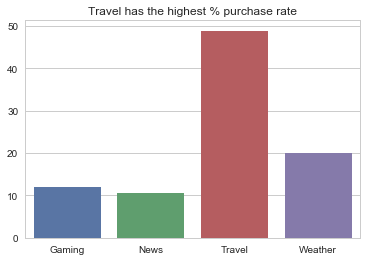

In [224]:
sns.barplot(x="Category", y="purchase", data=ad_category);
plt.title('Travel has the highest % purchase rate')

In [229]:
# Category Gaming
#create series for purchases, click_to_purchases, and full impressions for ad category Gaming
purchase_Gaming = Purchase[(Purchase.Category == 'Gaming')]
click_Gaming = Purchase_Click[(Purchase_Click.Category == 'Gaming')]
impression_Gaming = df[(df.Category == 'Gaming')]

#find click to purchase rate of ad category Gaming
click_to_purchase_rate_Gaming = len(click_Gaming)/float(len(impression_Gaming)) * 100
print "Gaming purchase %:",click_to_purchase_rate_Gaming

# Category News
#create series for purchases, click_to_purchases, and full impressions for ad category News
purchase_News = Purchase[(Purchase.Category == 'News')]
click_News = Purchase_Click[(Purchase_Click.Category == 'News')]
impression_News = df[(df.Category == 'News')]

#find full purchase rate of ad category News
click_to_purchase_rate_News = len(click_News)/float(len(impression_News)) * 100
print "News purchase %:",click_to_purchase_rate_News

# Category Travel
#create series for purchases, click_to_purchases, and full impressions for ad category Travel
purchase_Travel = Purchase[(Purchase.Category == 'Travel')]
click_Travel = Purchase_Click[(Purchase_Click.Category == 'Travel')]
impression_Travel = df[(df.Category == 'Travel')]

#find full purchase rate of ad category Travel
click_to_purchase_rate_Travel = len(click_Travel)/float(len(impression_Travel)) * 100
print "Travel purchase %:",click_to_purchase_rate_Travel

# Category Weather
#create series for purchases, click_to_purchases, and full impressions for ad category Weather
purchase_Weather = Purchase[(Purchase.Category == 'Weather')]
click_Weather = Purchase_Click[(Purchase_Click.Category == 'Weather')]
impression_Weather = df[(df.Category == 'Weather')]

#find full purchase rate of ad category Weather
click_to_purchase_rate_Weather = len(click_Weather)/float(len(impression_Weather)) * 100
print "Weather purchase %:",click_to_purchase_rate_Weather

Gaming purchase %: 6.0
News purchase %: 6.0
Travel purchase %: 11.5555555556
Weather purchase %: 10.0


In [234]:
ad_category_click = {'Category': ['Gaming', 'News', 'Travel', 'Weather'],'purchase': [click_to_purchase_rate_Gaming, click_to_purchase_rate_News, click_to_purchase_rate_Travel, click_to_purchase_rate_Weather]}
categ_df1 = pd.DataFrame(data=ad_category_click)
categ_df1

,Category,purchase
0,Gaming,6.000000
1,News,6.000000
2,Travel,11.555556
3,Weather,10.000000


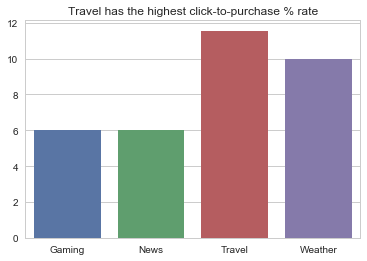

In [237]:
#create a graph to show the click to purchase rate for each category
sns.barplot(x="Category", y="purchase", data=ad_category_click);
plt.title('Travel has the highest click-to-purchase % rate')

# Ad Format (ROI)

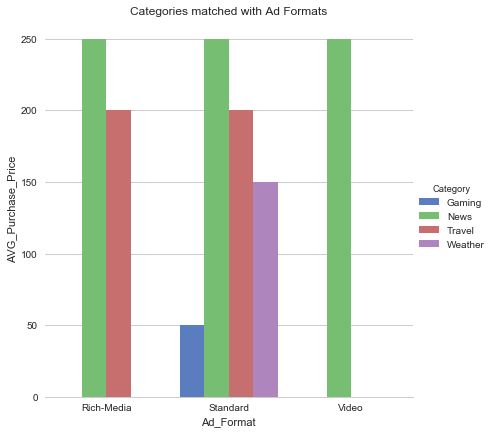

In [271]:
import seaborn as sns
sns.set(style="whitegrid")
#create a graph to show the average price and cpi of the categories
g = sns.factorplot(x="Ad_Format", y="AVG_Purchase_Price", hue="Category", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("AVG_Purchase_Price")
plt.title('Categories matched with Ad Formats')

In [276]:
# Format Standard
#create series total price cpi, total money made
impression_Standard = df[(df.Ad_Format == 'Standard')]
CPI_paid_Standard = impression_Standard['CPI'].sum()

purchase_Standard = Purchase[(Purchase.Ad_Format == 'Standard')]
Amount_made_Standard = purchase_Standard['AVG_Purchase_Price'].sum()

#Get ROI for Ad_Format
ROI_Standard = (float(Amount_made_Standard)-float(CPI_paid_Standard))/CPI_paid_Standard
print "Standard ROI:", ROI_Standard

# Format Rich-Media
#create series total price cpi, total money made
impression_Rich = df[(df.Ad_Format == 'Rich-Media')]
CPI_paid_Rich = impression_Rich['CPI'].sum()

purchase_Rich = Purchase[(Purchase.Ad_Format == 'Rich-Media')]
Amount_made_Rich = purchase_Rich['AVG_Purchase_Price'].sum()

#Get ROI for Ad_Format Rich-media
ROI_Rich = (float(Amount_made_Rich)-float(CPI_paid_Rich))/CPI_paid_Rich
print "Rich ROI:", ROI_Rich

# Format Video
#create series total price cpi, total money made
impression_Video = df[(df.Ad_Format == 'Video')]
CPI_paid_Video = impression_Video['CPI'].sum()

purchase_Video = Purchase[(Purchase.Ad_Format == 'Video')]
Amount_made_Video = purchase_Video['AVG_Purchase_Price'].sum()

#Get ROI for Ad_Format Video
ROI_Video = (float(Amount_made_Video)-float(CPI_paid_Video))/CPI_paid_Video
print "Video ROI:", ROI_Video

#figure loss on video ad
loss = CPI_paid_Video * ROI_Video
print "Money lost on video ad",loss

Standard ROI: 2.47429078014
Rich ROI: 3.78977272727
Video ROI: -0.21875
Money lost on video ad -6300.0


In [249]:
ROI_Format = {'ROI': [ROI_Standard, ROI_Rich, ROI_Video],'Ad_Format': ['Standard', 'Rich-Media', 'Video']}
ROI_f = pd.DataFrame(data=ROI_Format)
ROI_f

,Ad_Format,ROI
0,Standard,2.474291
1,Rich-Media,3.789773
2,Video,-0.218750


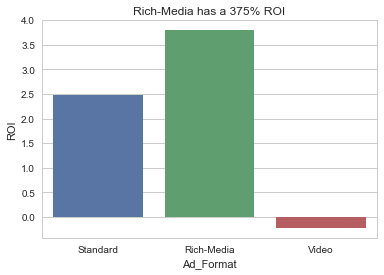

In [252]:
sns.barplot(x="Ad_Format", y="ROI", data=ROI_f);
plt.title('Rich-Media has a 375% ROI')

# Ad Format Conversion

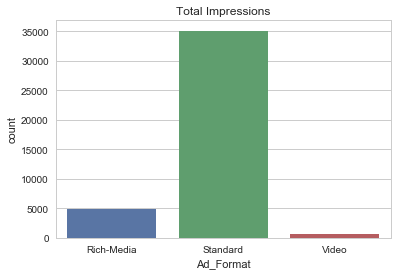

In [279]:
#plot number of total impressions for each ad size
sns.countplot(x="Ad_Format", data=df)
plt.title('Total Impressions')

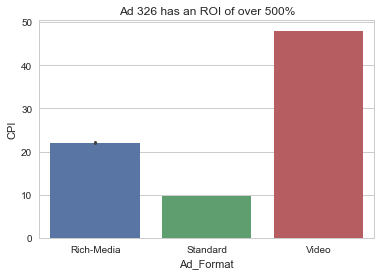

In [280]:
sns.barplot(x="Ad_Format", y="CPI", data=df);
plt.title('Ad 326 has an ROI of over 500%')

In [246]:
# Format Standard
#create series for purchases, click_to_purchases, and full impressions for ad format Standard
purchase_Standard = Purchase[(Purchase.Ad_Format == 'Standard')]
click_Standard = Purchase_Click[(Purchase_Click.Ad_Format == 'Standard')]
impression_Standard = df[(df.Ad_Format == 'Standard')]

#find full purchase rate of ad category Gaming
purchase_rate_Standard = len(purchase_Standard)/float(len(impression_Standard)) * 100
print "Standard purchase %:",purchase_rate_Standard

# Format Rich-Media
#create series for purchases, click_to_purchases, and full impressions for ad category Gaming
purchase_Rich = Purchase[(Purchase.Ad_Format == 'Rich-Media')]
click_Rich = Purchase_Click[(Purchase_Click.Ad_Format == 'Rich-Media')]
impression_Rich = df[(df.Ad_Format == 'Rich-Media')]

#find full purchase rate of ad category Gaming
purchase_rate_Rich = len(purchase_Rich)/float(len(impression_Rich)) * 100
print "Rich-Media purchase %:",purchase_rate_Rich

# Format Video
#create series for purchases, click_to_purchases, and full impressions for ad category Gaming
purchase_Video = Purchase[(Purchase.Ad_Format == 'Video')]
click_Video = Purchase_Click[(Purchase_Click.Ad_Format == 'Video')]
impression_Video = df[(df.Ad_Format == 'Video')]

#find full purchase rate of ad category Gaming
purchase_rate_Video = len(purchase_Video)/float(len(impression_Video)) * 100
print "Video purchase %:",purchase_rate_Video

Standard purchase %: 20.6324786325
Rich-Media purchase %: 51.75
Video purchase %: 15.0


In [254]:
ROI_Format1 = {'purchase': [purchase_rate_Standard, purchase_rate_Rich, purchase_rate_Video],'Ad_Format': ['Standard', 'Rich-Media', 'Video']}
ROI_f1 = pd.DataFrame(data=ROI_Format1)
ROI_f1

,Ad_Format,purchase
0,Standard,20.632479
1,Rich-Media,51.750000
2,Video,15.000000


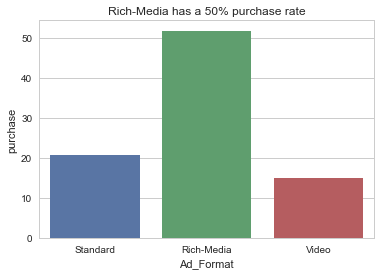

In [257]:
sns.barplot(x="Ad_Format", y="purchase", data=ROI_f1);
plt.title('Rich-Media has a 50% purchase rate')

In [261]:

# Format Standard
#create series for purchases, click_to_purchases, and full impressions for ad format Standard
purchase_Standard = Purchase[(Purchase.Ad_Format == 'Standard')]
click_Standard = Purchase_Click[(Purchase_Click.Ad_Format == 'Standard')]
impression_Standard = df[(df.Ad_Format == 'Standard')]

#find full purchase rate of ad category Gaming
click_to_purchase_rate_Standard = len(click_Standard)/float(len(impression_Standard)) * 100
print "Standard click_to_purchase %:",click_to_purchase_rate_Standard

# Format Rich-Media
#create series for purchases, click_to_purchases, and full impressions for ad rich media
purchase_Rich = Purchase[(Purchase.Ad_Format == 'Rich-Media')]
click_Rich = Purchase_Click[(Purchase_Click.Ad_Format == 'Rich-Media')]
impression_Rich = df[(df.Ad_Format == 'Rich-Media')]

#find full purchase rate of ad category rich_media
click_to_purchase_rate_Rich = len(click_Rich)/float(len(impression_Rich)) * 100
print "Rich-Media click_to_purchase %:",click_to_purchase_rate_Rich

# Format Video
#create series for purchases, click_to_purchases, and full impressions for ad video
purchase_Video = Purchase[(Purchase.Ad_Format == 'Video')]
click_Video = Purchase_Click[(Purchase_Click.Ad_Format == 'Video')]
impression_Video = df[(df.Ad_Format == 'Video')]

#find full purchase rate of ad category Gaming
click_to_purchase_rate_Video = len(click_Video)/float(len(impression_Video)) * 100
print "Video click_to_purchase %:",click_to_purchase_rate_Video

Standard click_to_purchase %: 8.22222222222
Rich-Media click_to_purchase %: 13.5
Video click_to_purchase %: 6.0


In [262]:
ROI_Format2 = {'click_to_purchase': [click_to_purchase_rate_Standard, click_to_purchase_rate_Rich, click_to_purchase_rate_Video],'Ad_Format': ['Standard', 'Rich-Media', 'Video']}
ROI_f2 = pd.DataFrame(data=ROI_Format2)
ROI_f2

,Ad_Format,click_to_purchase
0,Standard,8.222222
1,Rich-Media,13.500000
2,Video,6.000000


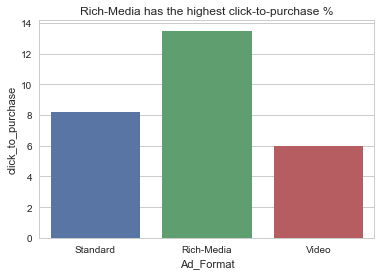

In [266]:
sns.barplot(x="Ad_Format", y="click_to_purchase", data=ROI_f2);
plt.title('Rich-Media has the highest click-to-purchase %')

# Conclusions:

Ad Size:
    
The larger ads had the highest Click-to-Purchase rates. Ad Size 970x250 was the highest at 16%, with the highest overall purcahse rate too at 64%. The other Ad Sizes that performed particularly well were 500x600 and 300x600, both had click-to-purchase rates around 12%
    
The lowest click-to_purchase ad size was 728x90 at 5.28. The news video has the lowest overall purchase rate at only 15% with only 6% coming from clicks.
    
Placement:

3714, 3715, and 3716 are the placement Ids with the highest click-to-purchase rates. Placements 3715 and 3716 also have the highest overall purchase rates at 64%.
    
Ad ID:
     
Ad ID 326 has the highest click-to purchase rate. It is a Travel Ad that brings an over 500% return on investment. We are losing money on our video news ad with an ROI of -22%.
    
Categories:

Travel has the highest return on investment at 567%. News has the lowest at 11%. Travel also has the highest overall purchase rate at 48.89%, but the click-to purchase rate is only 11.55%. The much lower click-to-purchase rate suggests that a confounding variable of this study is that travel is a necessity of many customers. 

Weather has a 20% overall purchase rate and a 10% click-to-purchase rate. Gaming and news also have around 50% of their purchases made through clicks on their ads.
    
Format:

Rich-Media features only Travel and News ads and has a 375% return on investment. Rich-Media has a 50% conversion rate, which is more than double that of Standard or Video.

Recommendations:

1. Remove the video news ad with the Ad ID 328. We've lost $6300 on that video.

2. Further explore why the percentage of click-to-purchase rates on travel are so low in comparison to their overall purchase rates. If there is a better way to advertize to people who are buying out of necessity; we could win over even more purchasers.

3. Take a closer look at the individual Rich-Media Format campaigns. The return on investment and the purchase rates affiliated with them are sky high, but they do represent a very small sample size in comparison to our standard ad format.